In [1]:
import os
import cv2
import shutil
import random
import numpy as np
from glob import glob
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt


In [10]:
# Path to the folder containing images
folder_path = "D:\\Roboflow\\dataset\\images"

# Directory to store train and test directories
data_dir = "D:\\Roboflow\\dataset"

# Create data directory if it doesn't exist
os.makedirs(data_dir, exist_ok=True)

# Path to the train and test directories
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


# Percentage split for train-test
split_percentage = 0.8

train_dir ='dataset/train'
test_dir ='dataset/test'

In [11]:

def is_folder_empty(folder):
    return len(os.listdir(folder)) == 0

# Check if train and test directories are empty
train_empty = is_folder_empty(train_dir)
test_empty = is_folder_empty(test_dir)

if train_empty and test_empty:
    # Your code for splitting images into train and test sets here
    # Path to the folder containing images
    folder_path = "dataset/images"

    # List to store image file names
    image_files = []

    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_files.append(filename)

    # Calculate the number of images for the train set
    num_train = int(len(image_files) * split_percentage)

    # Randomly shuffle the list of image files
    random.shuffle(image_files)

    # Copy images to train directory
    for filename in image_files[:num_train]:
        src = os.path.join(folder_path, filename)
        dst = os.path.join(train_dir, filename)
        shutil.copyfile(src, dst)

    # Copy images to test directory
    for filename in image_files[num_train:]:
        src = os.path.join(folder_path, filename)
        dst = os.path.join(test_dir, filename)
        shutil.copyfile(src, dst)

    print("Images split into train and test directories.")
else:
    print("Train or test directory is not empty. Skipping split operation.")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'images'

In [6]:
# masked_img_folder = r'D:\Roboflow\dataset\masked_img'
masked_img_folder = 'D:\\Roboflow\\dataset\\masked_img'


In [8]:
# Function to read images from a folder
def read_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return images

# Read images from train folder
train_images = read_images_from_folder(train_dir)

# Read images from test folder
test_images = read_images_from_folder(test_dir)

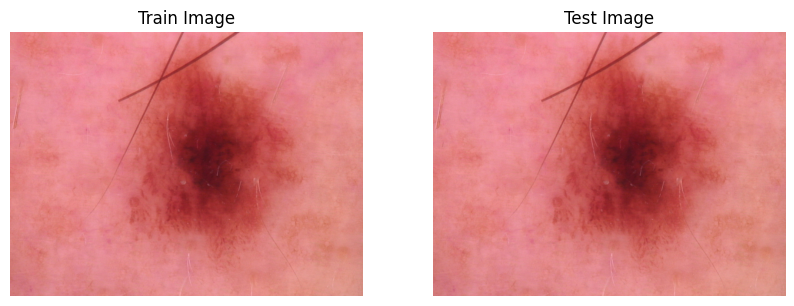

In [9]:
# Display one image from each folder
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(train_images[0])
plt.title('Train Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(test_images[0])
plt.title('Test Image')
plt.axis('off')

plt.show()